374129 podcasts


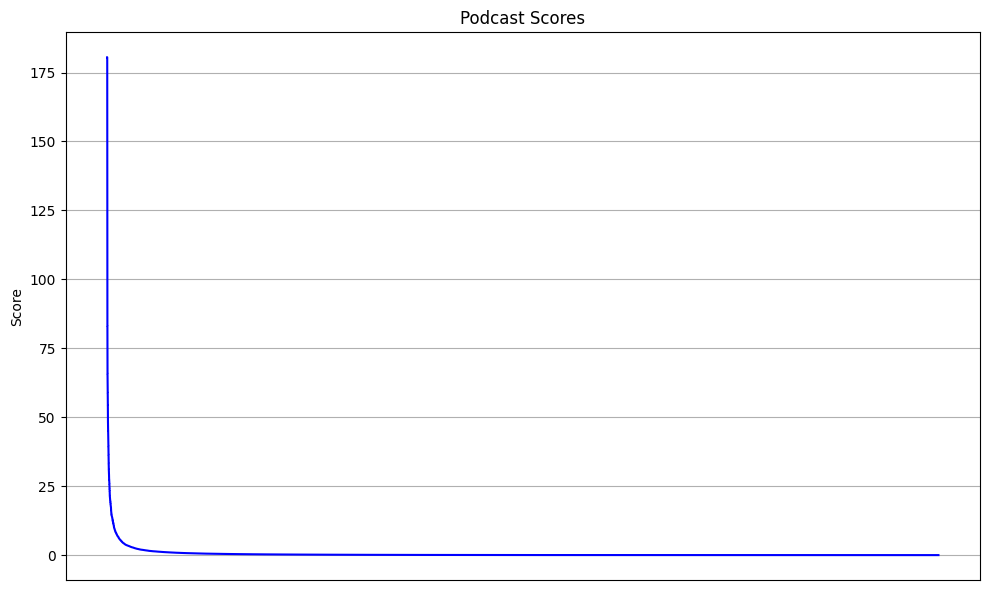

In [10]:
import sqlite3
import matplotlib.pyplot as plt


def plot_scores():
    conn = sqlite3.connect("../data/podcasts.db")
    cursor = conn.cursor()

    cursor.execute(
        """
        SELECT score.rank_score
        FROM podcast
        INNER JOIN score ON podcast.id = score.podcast_id
        ORDER BY score.rank_score DESC
        """
    )

    scores = [podcast[0] for podcast in cursor.fetchall()]
    print(len(scores), "podcasts")

    plt.figure(figsize=(10, 6))
    plt.plot(scores, linestyle="-", color="b", label="Podcast Scores")

    plt.xticks([])

    plt.ylabel("Score")
    plt.title("Podcast Scores")

    plt.grid(True)

    plt.tight_layout()
    plt.show()

    conn.close()


plot_scores()

In [11]:
# Overall top 1000 podcasts
from pathlib import Path
import sqlite3

working_dir = Path("../working")
working_dir.mkdir(exist_ok=True)


def get_top_podcasts():
    conn = sqlite3.connect("../data/podcasts.db")
    cursor = conn.cursor()

    cursor.execute(
        """
        WITH ranked_scores AS (
            SELECT
                podcast.name,
                podcast.url,
                podcast.category,
                score.rank_score,
                ROW_NUMBER() OVER (PARTITION BY podcast.id ORDER BY score.rank_score DESC) AS rn
            FROM podcast
            JOIN score ON podcast.id = score.podcast_id
        )
        SELECT name, url, rank_score, category
        FROM ranked_scores
        WHERE rn = 1
        ORDER BY rank_score DESC
        LIMIT 1000;
        """
    )

    top_podcasts = cursor.fetchall()

    conn.close()

    return top_podcasts


top_podcasts = get_top_podcasts()
for name, url, score, category in top_podcasts:
    print(f"{score:.2f} - {category} - {name} - {url}")

results = [
    f'<div><a href="{url}">{idx+1} - {score:.2f} - {category} - {name}</a></div>'
    for idx, (name, url, score, category) in enumerate(top_podcasts)
]

results_html = "\n".join(results)
html = f"""
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Top Podcasts</title>
    </head>
    <body>
        {results_html}
    </body>
</html>
"""
out_path = working_dir / f"top_podcasts.html"
with open(out_path, "w") as f:
    f.write(html)
    f.close()

180.54 - education - The Mel Robbins Podcast - https://podcasts.apple.com/au/podcast/the-mel-robbins-podcast/id1646101002
177.11 - history - The Rest Is History - https://podcasts.apple.com/au/podcast/the-rest-is-history/id1537788786
162.03 - comedy - The Joe Rogan Experience - https://podcasts.apple.com/au/podcast/the-joe-rogan-experience/id360084272
152.08 - business - The Diary Of A CEO with Steven Bartlett - https://podcasts.apple.com/au/podcast/the-diary-of-a-ceo-with-steven-bartlett/id1291423644
132.70 - news - The Daily - https://podcasts.apple.com/au/podcast/the-daily/id1200361736
125.28 - health_and_fitness - On Purpose with Jay Shetty - https://podcasts.apple.com/au/podcast/on-purpose-with-jay-shetty/id1450994021
102.83 - tv_and_film - The Rest Is Entertainment - https://podcasts.apple.com/au/podcast/the-rest-is-entertainment/id1718287198
88.90 - technology - All-In with Chamath, Jason, Sacks & Friedberg - https://podcasts.apple.com/au/podcast/all-in-with-chamath-jason-sacks-

In [12]:
# top 100 news podcasts
from pathlib import Path
import sqlite3

working_dir = Path("../working")
working_dir.mkdir(exist_ok=True)


def get_top_podcasts():
    conn = sqlite3.connect("../data/podcasts.db")
    cursor = conn.cursor()

    cursor.execute(
        """
        WITH ranked_scores AS (
        SELECT
            podcast.name,
            podcast.url,
            score.rank_score,
            ROW_NUMBER() OVER (
            PARTITION BY podcast.id
            ORDER BY score.rank_score DESC
            ) AS rn
        FROM podcast
        INNER JOIN score ON podcast.id = score.podcast_id
        WHERE podcast.category = 'news'
        )
        SELECT name, url, rank_score
        FROM ranked_scores
        WHERE rn = 1
        ORDER BY rank_score DESC
        LIMIT 100;
        """
    )

    top_podcasts = cursor.fetchall()

    conn.close()

    return top_podcasts


top_podcasts = get_top_podcasts()
for name, url, score in top_podcasts:
    print(f"{score:.2f} - {name} - {url}")

results = [
    f'<div><a href="{url}">{idx+1} - {score:.2f} - {name}</a></div>'
    for idx, (name, url, score) in enumerate(top_podcasts)
]

results_html = "\n".join(results)
html = f"""
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Top Podcasts</title>
    </head>
    <body>
        {results_html}
    </body>
</html>
"""
out_path = working_dir / f"news_podcasts.html"
with open(out_path, "w") as f:
    f.write(html)
    f.close()

132.70 - The Daily - https://podcasts.apple.com/au/podcast/the-daily/id1200361736
50.86 - The Rest Is Politics: US - https://podcasts.apple.com/au/podcast/the-rest-is-politics-us/id1743030473
35.47 - The Rest Is Politics - https://podcasts.apple.com/au/podcast/the-rest-is-politics/id1611374685
29.38 - The MeidasTouch Podcast - https://podcasts.apple.com/au/podcast/the-meidastouch-podcast/id1510240831
25.88 - Global News Podcast - https://podcasts.apple.com/au/podcast/global-news-podcast/id135067274
19.77 - Pod Save America - https://podcasts.apple.com/au/podcast/pod-save-america/id1192761536
19.14 - Front Burner - https://podcasts.apple.com/ca/podcast/front-burner/id1439621628
17.78 - Behind the Story - https://podcasts.apple.com/ie/podcast/behind-the-story/id1810674298
14.97 - Diddy On Trial - https://podcasts.apple.com/au/podcast/diddy-on-trial/id1781636710
12.05 - Politics Now - https://podcasts.apple.com/au/podcast/politics-now/id1102298716
11.73 - The Megyn Kelly Show - https://po

In [ ]:
# top 100 news with country weights
from pathlib import Path
import sqlite3

working_dir = Path("../working")
working_dir.mkdir(exist_ok=True)


def get_top_podcasts():
    conn = sqlite3.connect("../data/podcasts.db")
    cursor = conn.cursor()

    cursor.execute(
        """
        WITH ranked_scores AS (
        SELECT
            p.id,
            p.name,
            p.url,
            s.rank_score,
            ROW_NUMBER() OVER (
            PARTITION BY p.id
            ORDER BY s.rank_score DESC
            ) AS rn
        FROM podcast p
        INNER JOIN score s ON p.id = s.podcast_id
        WHERE p.category = 'news'
        )
        SELECT
        rs.name,
        rs.url,
        rs.rank_score,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'us' ORDER BY r.scraped_at DESC LIMIT 1) as us_rank,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'ca' ORDER BY r.scraped_at DESC LIMIT 1) as ca_rank,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'gb' ORDER BY r.scraped_at DESC LIMIT 1) as gb_rank,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'au' ORDER BY r.scraped_at DESC LIMIT 1) as au_rank,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'nz' ORDER BY r.scraped_at DESC LIMIT 1) as nz_rank,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'ie' ORDER BY r.scraped_at DESC LIMIT 1) as ie_rank
        FROM ranked_scores rs
        WHERE rs.rn = 1
        ORDER BY rs.rank_score DESC
        LIMIT 100;
        """
    )

    top_podcasts = cursor.fetchall()

    conn.close()

    return top_podcasts


def format_ranks(us, ca, gb, au, nz, ie):
    ranks = []
    if us is not None:
        ranks.append(f"US: {us}")
    if ca is not None:
        ranks.append(f"CA: {ca}")
    if gb is not None:
        ranks.append(f"GB: {gb}")
    if au is not None:
        ranks.append(f"AU: {au}")
    if nz is not None:
        ranks.append(f"NZ: {nz}")
    if ie is not None:
        ranks.append(f"IE: {ie}")
    return " ".join(ranks)


top_podcasts = get_top_podcasts()

# Display in console
for name, url, score, us, ca, gb, au, nz, ie in top_podcasts:
    rank_info = format_ranks(us, ca, gb, au, nz, ie)
    print(f"{score:.2f} - {name} - {url} | {rank_info}")

# Create HTML output
results = [
    f'<div><a href="{url}">{idx+1} - {score:.2f} - {name} | {format_ranks(us, ca, gb, au, nz, ie)}</a></div>'
    for idx, (name, url, score, us, ca, gb, au, nz, ie) in enumerate(top_podcasts)
]

results_html = "\n".join(results)

html = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Top News Podcasts</title>
</head>
<body>
    {results_html}
</body>
</html>
"""
out_path = working_dir / f"news_podcasts_country_weights.html"
with open(out_path, "w") as f:
    f.write(html)
    f.close()

132.70 - The Daily - https://podcasts.apple.com/au/podcast/the-daily/id1200361736 | US: 1 CA: 1 GB: 16 AU: 1 NZ: 1 IE: 11
50.86 - The Rest Is Politics: US - https://podcasts.apple.com/au/podcast/the-rest-is-politics-us/id1743030473 | US: 95 CA: 41 GB: 4 AU: 2 NZ: 5 IE: 3
35.47 - The Rest Is Politics - https://podcasts.apple.com/au/podcast/the-rest-is-politics/id1611374685 | US: 146 CA: 38 GB: 2 AU: 3 NZ: 4 IE: 5
29.38 - The MeidasTouch Podcast - https://podcasts.apple.com/au/podcast/the-meidastouch-podcast/id1510240831 | US: 2 CA: 3 GB: 21 AU: 14 NZ: 13 IE: 24
25.88 - Global News Podcast - https://podcasts.apple.com/au/podcast/global-news-podcast/id135067274 | US: 23 CA: 9 GB: 15 AU: 8 NZ: 2 IE: 17
19.77 - Pod Save America - https://podcasts.apple.com/au/podcast/pod-save-america/id1192761536 | US: 3 CA: 11 GB: 14 AU: 9 NZ: 10 IE: 15
19.14 - Front Burner - https://podcasts.apple.com/ca/podcast/front-burner/id1439621628 | CA: 2
17.78 - Behind the Story - https://podcasts.apple.com/ie/pod

In [14]:
# top 100 society and culture with country weights
from pathlib import Path
import sqlite3

workingdir = Path("../working")
working_dir.mkdir(exist_ok=True)


def get_top_podcasts():
    conn = sqlite3.connect("../data/podcasts.db")
    cursor = conn.cursor()

    cursor.execute(
        """
        WITH ranked_scores AS (
        SELECT
            p.id,
            p.name,
            p.url,
            s.rank_score,
            ROW_NUMBER() OVER (
            PARTITION BY p.id
            ORDER BY s.rank_score DESC
            ) AS rn
        FROM podcast p
        INNER JOIN score s ON p.id = s.podcast_id
        WHERE p.category = 'society_and_culture'
        )
        SELECT
        rs.name,
        rs.url,
        rs.rank_score,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'us' ORDER BY r.scraped_at DESC LIMIT 1) as us_rank,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'ca' ORDER BY r.scraped_at DESC LIMIT 1) as ca_rank,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'gb' ORDER BY r.scraped_at DESC LIMIT 1) as gb_rank,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'au' ORDER BY r.scraped_at DESC LIMIT 1) as au_rank,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'nz' ORDER BY r.scraped_at DESC LIMIT 1) as nz_rank,
        (SELECT r.rank FROM ranking r WHERE r.podcast_id = rs.id AND r.country = 'ie' ORDER BY r.scraped_at DESC LIMIT 1) as ie_rank
        FROM ranked_scores rs
        WHERE rs.rn = 1
        ORDER BY rs.rank_score DESC
        LIMIT 100;
        """
    )

    top_podcasts = cursor.fetchall()

    conn.close()

    return top_podcasts


def format_ranks(us, ca, gb, au, nz, ie):
    ranks = []
    if us is not None:
        ranks.append(f"US: {us}")
    if ca is not None:
        ranks.append(f"CA: {ca}")
    if gb is not None:
        ranks.append(f"GB: {gb}")
    if au is not None:
        ranks.append(f"AU: {au}")
    if nz is not None:
        ranks.append(f"NZ: {nz}")
    if ie is not None:
        ranks.append(f"IE: {ie}")
    return " ".join(ranks)


top_podcasts = get_top_podcasts()

# Display in console
for name, url, score, us, ca, gb, au, nz, ie in top_podcasts:
    rank_info = format_ranks(us, ca, gb, au, nz, ie)
    print(f"{score:.2f} - {name} - {url} | {rank_info}")

# Create HTML output
results = [
    f'<div><a href="{url}">{idx+1} - {score:.2f} - {name} | {format_ranks(us, ca, gb, au, nz, ie)}</a></div>'
    for idx, (name, url, score, us, ca, gb, au, nz, ie) in enumerate(top_podcasts)
]

results_html = "\n".join(results)

html = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Top News Podcasts</title>
</head>
<body>
    {results_html}
</body>
</html>
"""
out_path = working_dir / f"society_and_culture_podcasts_country_weights.html"
with open(out_path, "w") as f:
    f.write(html)
    f.close()

50.68 - The Louis Theroux Podcast - https://podcasts.apple.com/au/podcast/the-louis-theroux-podcast/id1725833532 | US: 181 CA: 76 GB: 1 AU: 6 NZ: 4 IE: 1
44.25 - Mamamia Out Loud - https://podcasts.apple.com/au/podcast/mamamia-out-loud/id928350893 | GB: 185 AU: 1 NZ: 8 IE: 108
36.46 - The Ezra Klein Show - https://podcasts.apple.com/au/podcast/the-ezra-klein-show/id1548604447 | US: 2 CA: 2 GB: 12 AU: 10 NZ: 5 IE: 8
24.11 - Stuff You Should Know - https://podcasts.apple.com/au/podcast/stuff-you-should-know/id278981407 | US: 5 CA: 3 GB: 19 AU: 11 NZ: 9 IE: 28
23.46 - Conversations - https://podcasts.apple.com/au/podcast/conversations/id94688506 | AU: 2 NZ: 16
16.77 - The Telepathy Tapes - https://podcasts.apple.com/au/podcast/the-telepathy-tapes/id1766382649 | US: 6 CA: 5 GB: 13 AU: 8 NZ: 17 IE: 27
15.68 - Documentary on One Podcast - https://podcasts.apple.com/ie/podcast/documentary-on-one-podcast/id107923803 | GB: 183 NZ: 152 IE: 2
14.60 - Between Two Beers Podcast - https://podcasts.a